In [1]:
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import threading
import time
from matplotlib import cm

with open('data/q3/logisticX.csv') as fp: 
    x=[]
    for line in fp:
        line=line[:-1]
        [x1,x2]=line.split(',')
#         print(x1,x2)
        x.append(float(x1))
        x.append(float(x2))
# print(x)      
# print(len(x))
with open('data/q3/logisticY.csv') as fp: 
    y=[]
    for line in fp:
        y.append(float(line[:-1]))
#print(Y)      
# print(len(y))

X = np.array(x).reshape(100,2)
# print(X)
Y = np.array(y).reshape(100,1)
print(Y.shape)

(100, 1)


In [2]:
def normalization(X):
    X_mean = np.mean(X)
    X_var= np.sum((X-X_mean)**2)/len(X)
    X_std_dev= np.sqrt(X_var)
    X_norm = (X- X_mean)/X_std_dev
    return X_norm

X1= X[:,0:1]
X2=X[:,1:2]

X1_norm = normalization(X1)
X2_norm= normalization(X2)
# print(X1_norm.shape)
X_norm = np.append(X1_norm, X2_norm, axis = 1)
X_norm = np.append(np.ones((X1_norm.shape[0], 1)), X_norm,axis = 1)
# print(X_norm[:,:10])
print(X_norm.shape)

(100, 3)


In [3]:
theta=np.zeros((3,1))
# print(theta)
def sigma(V):
    return np.array([1/(1+np.exp(-i)) for i in V])

# np.diag([1,2,3])
# print(theta.transpose())
# print(np.diag(theta[:,0]))

# print(np.array([1,2,3]).reshape(3,1)*np.array([10,3,5]).reshape(3,1))

def gradient(V):
    t= Y-(sigma(V).reshape(V.shape[0],1))
    return np.dot(X_norm.transpose(), t)

def Hessian(Th):
    temp=sigma(np.dot(X_norm,Th))
    D= temp*(np.ones((temp.shape[0],1))-temp)
    t=np.dot(X_norm.T,np.diag(-D[:,0]))
    return (np.dot(t, X_norm))

# print(Hessian(theta))
    
t= np.dot(X_norm,theta)

for i in range(7):
    G = gradient(np.dot(X_norm,theta))
    H=Hessian(theta)
    H_inv= np.linalg.inv(H)
    theta= theta - np.dot(H_inv, G)
    
res = theta   
# print(res.shape)  
# print(res)
# print(np.sum(np.dot(X_norm,theta)))
# print('Done')    
# print(t[:,0].shape)
# print(sigma(t[:,0]).shape)

# print(gradient(t[:,0]))
# print(Hessian)  


    
    

# print(len(X_norm))
Y0 =np.array([[X_norm[i][1],X_norm[i][2]]  for i in range(len(X_norm)) if Y[i]==0])
Y1 =np.array([[X_norm[i][1],X_norm[i][2]]  for i in range(len(X_norm)) if Y[i]==1])


x10= Y0[:,0:1]
x11=Y0[:,1:2]
x00= Y1[:,0:1]
x01=Y1[:,1:2]



[[-2.50000000e+01  1.77635684e-15 -1.88737914e-15]
 [ 1.77635684e-15 -2.50000000e+01  1.23957811e+01]
 [-1.88737914e-15  1.23957811e+01 -2.50000000e+01]]
[[-1.33223971e-16]
 [-8.97341408e-01]
 [ 9.20112283e-01]]
gradient [[  0.        ]
 [ 33.83904568]
 [-34.12605478]]
[[ 1.33223971e-16]
 [ 8.97341408e-01]
 [-9.20112283e-01]]
[[-16.67015307   0.63692543  -0.68514297]
 [  0.63692543 -11.56496155   3.01113727]
 [ -0.68514297   3.01113727 -11.47318617]]
[[-0.0916248 ]
 [-0.64924624]
 [ 0.65238769]]
gradient [[ 0.6668992 ]
 [ 9.41457848]
 [-9.37715884]]
[[ 0.0916248 ]
 [ 1.54658764]
 [-1.57249997]]
[[-11.29505368   0.96940762  -0.85973513]
 [  0.96940762  -6.01483528   0.05014815]
 [ -0.85973513   0.05014815  -5.63497973]]
[[-0.13762894]
 [-0.55734781]
 [ 0.61370041]]
gradient [[ 0.48660921]
 [ 3.24971265]
 [-3.36781488]]
[[ 0.22925374]
 [ 2.10393545]
 [-2.18620038]]
[[-8.46760424  1.13703868 -0.86211377]
 [ 1.13703868 -3.86622949 -0.7118158 ]
 [-0.86211377 -0.7118158  -3.42761171]]
[[-0.1

In [4]:
 [ 1.88737914e-15 -1.23957811e+01  2.50000000e+01]]
(3, 1)
[[ 0.40125316]
 [ 2.5885477 ]
 [-2.72558849]]
40.12531605455251

SyntaxError: invalid syntax (<ipython-input-4-fac420306383>, line 1)

(100, 1)


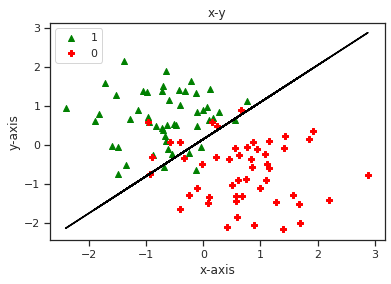

In [5]:
sb.set()
# sb.set_style("whitegrid")
sb.set_style("ticks")
fig, ax = plt.subplots()
# ax.plot(a,Y,'b^')
ax.scatter(x10,x11, marker="^", color='green', label= "1")
ax.scatter(x00,x01, marker="P", color='red', label ="0")
ax.legend()
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('x-y')
Y_dash = -(np.dot(X_norm[:,0:2],res[0:2,:]))/res[2][0]
print(Y_dash.shape)
plt.plot(X_norm[:,1:2],Y_dash,color='black')
plt.show()
